<a href="https://colab.research.google.com/github/inesblanco00/202216600/blob/main/TrainYOLOv8nCustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conectamos a Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Dirección

In [ ]:
ROOT_DIR = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset'

# **YOLO v8n**

### Instalamos las librerias necesarias

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.2/800.2 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

### **Importamos bibliotecas y reentrenamos la red**

In [ ]:
import os

from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

results= model.train(data=os.path.join(ROOT_DIR, "custom8.yaml"), epochs = 60, batch = 32, lr0 = 0.01) # train model


ModuleNotFoundError: No module named 'ultralytics'

### Código de reentrenamiento modificado

In [ ]:
import os
from ultralytics import YOLO

# Cargar el modelo preentrenado
model = YOLO('yolov8n.pt')

# Configurar hiperparámetros ajustados
epochs = 90
batch_size = 32
initial_lr = 0.01

# Configurar los parámetros de entrenamiento con un programador de tasa de aprendizaje
training_params = {
    'data': os.path.join(ROOT_DIR, "custom8.yaml"),  # Asegúrate de que la ruta sea correcta
    'epochs': epochs,
    'batch': batch_size,
    'lr0': initial_lr,
    'lrf': 0.0001,  # Factor de tasa de aprendizaje final
    'patience': 5,  # Paciencia para el scheduler
    'save_period': -1,  # Guardar el modelo al final de cada época
}

# Entrenar el modelo
model.train(**training_params)


### Descargamos resultados en google drive

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!scp -r /content/runs '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset'


### TensorBoard

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

# **Analisis de los resultados**




### Evaluación según las métricas

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'run'],
      dtype='object')


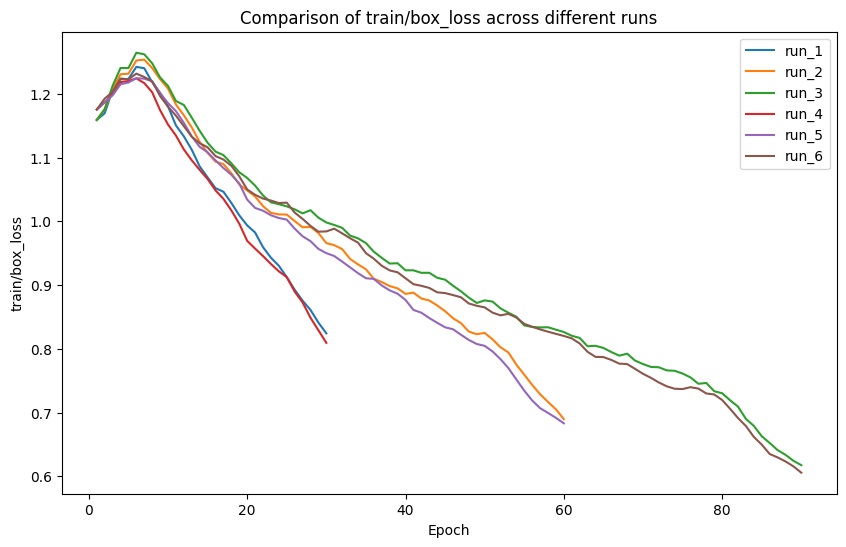

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

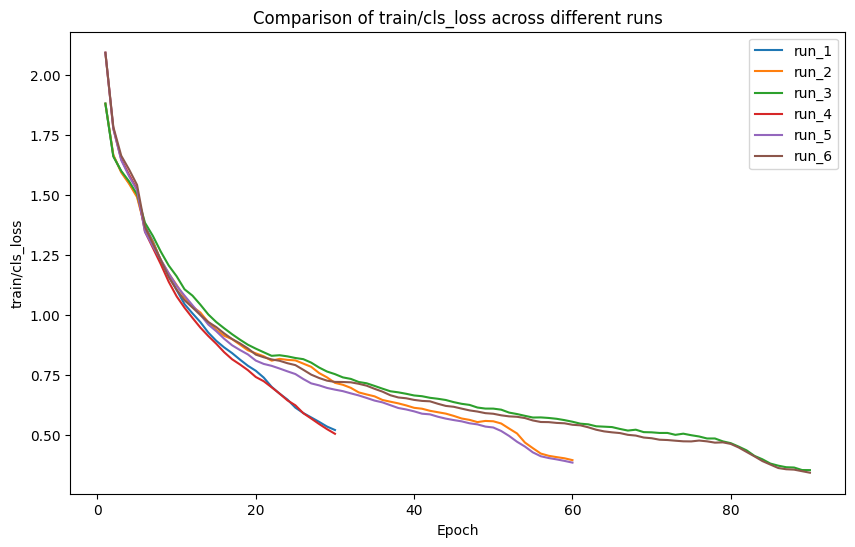

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

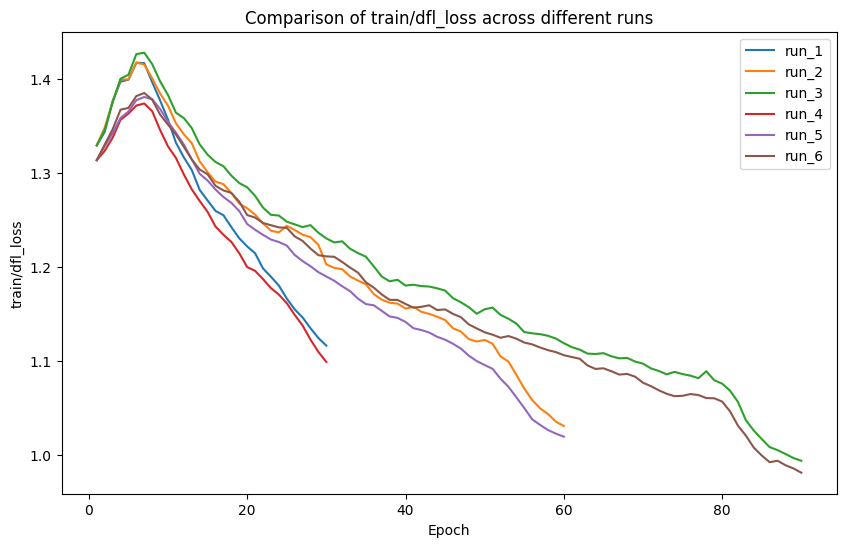

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

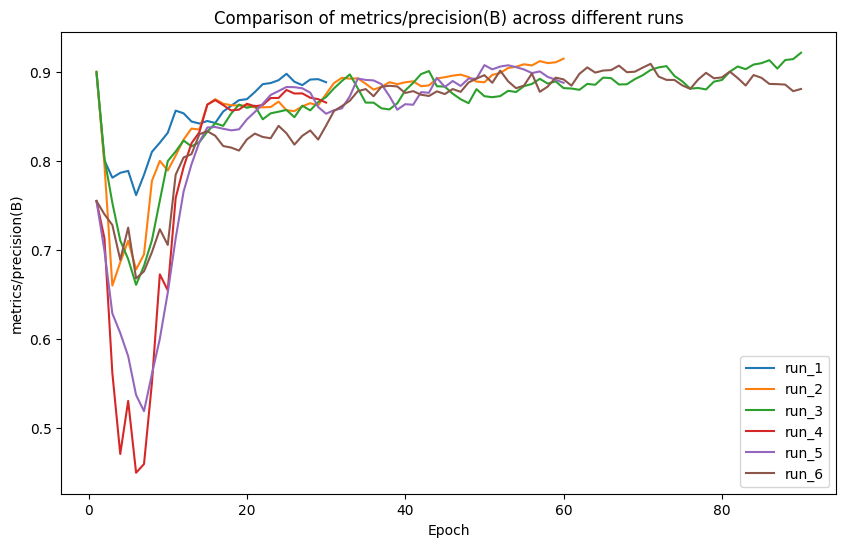

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

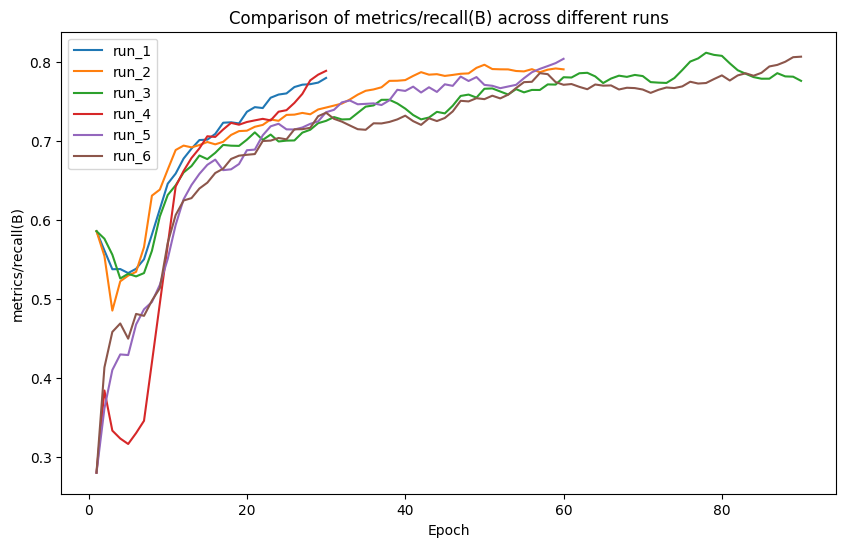

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

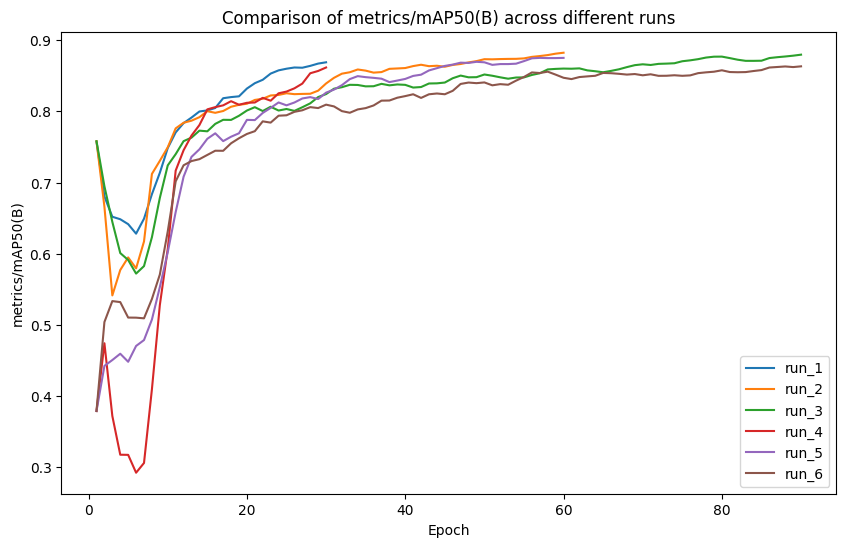

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

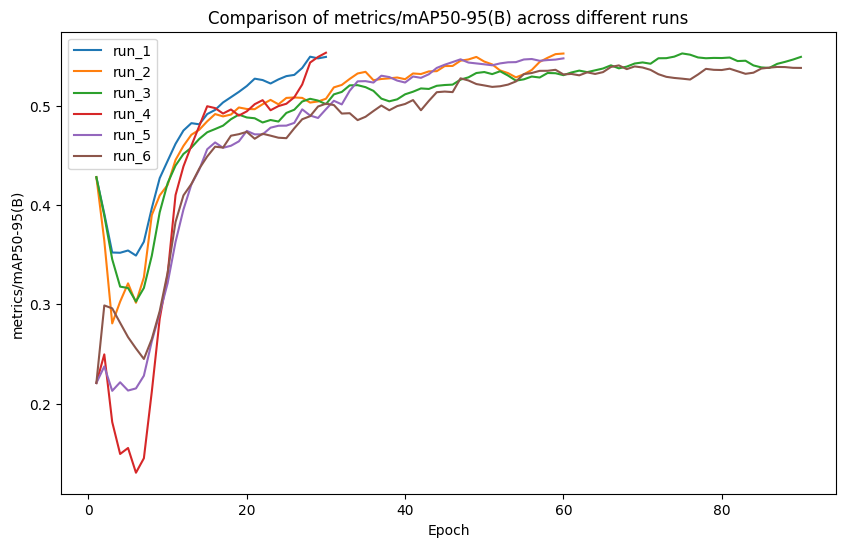

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

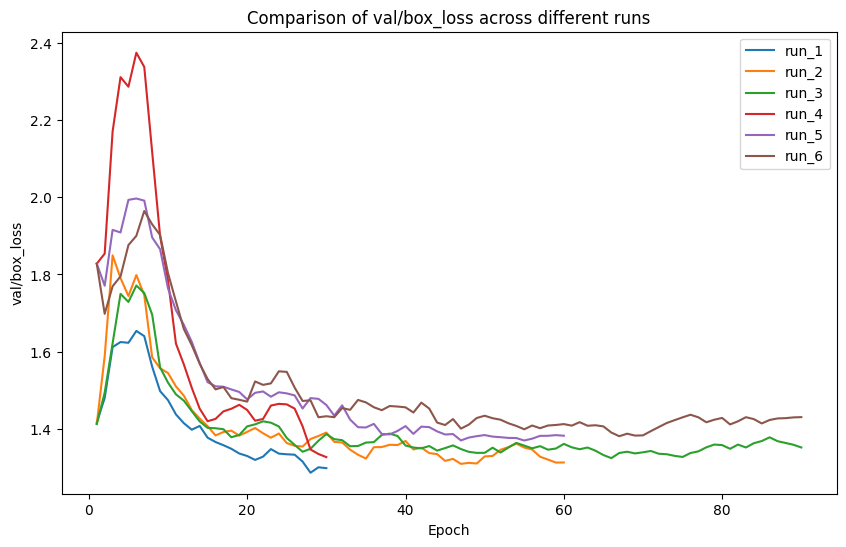

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

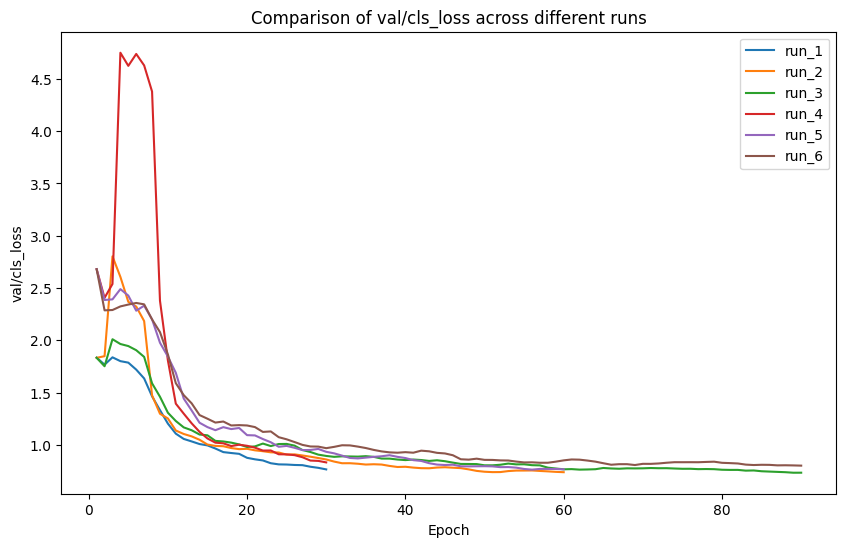

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

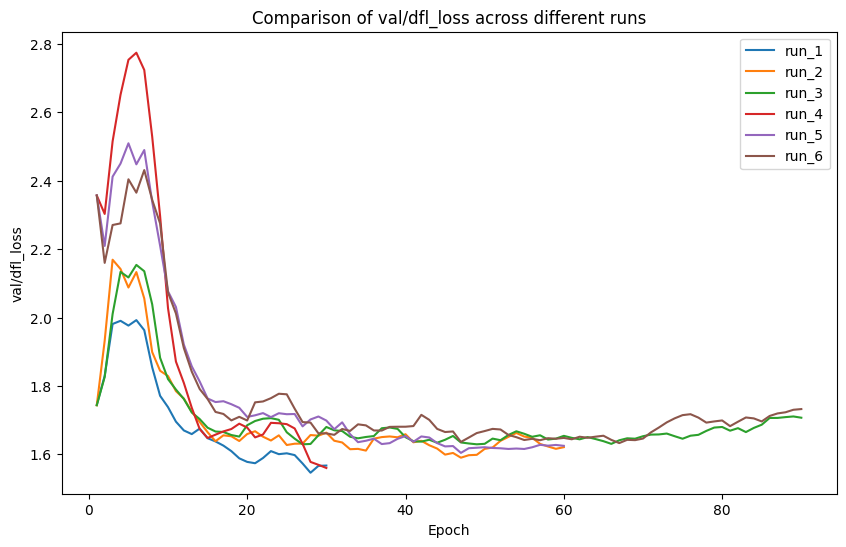

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

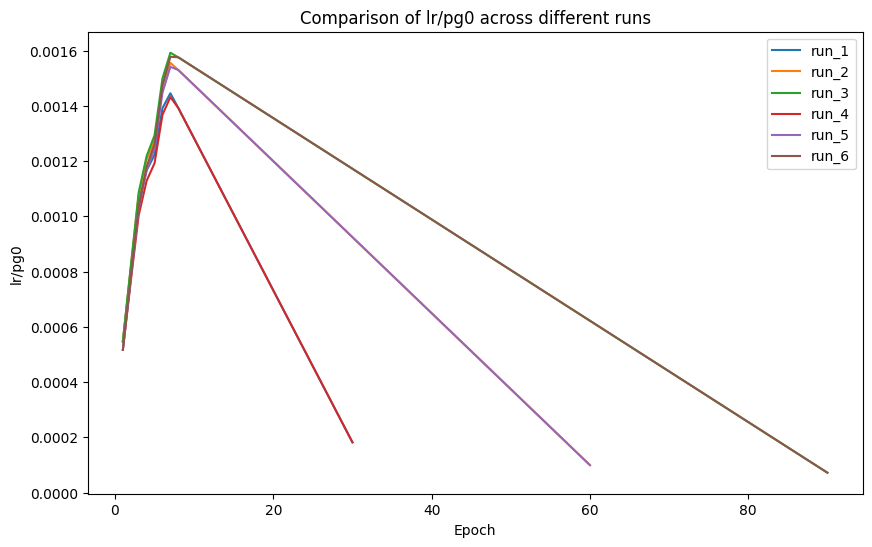

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

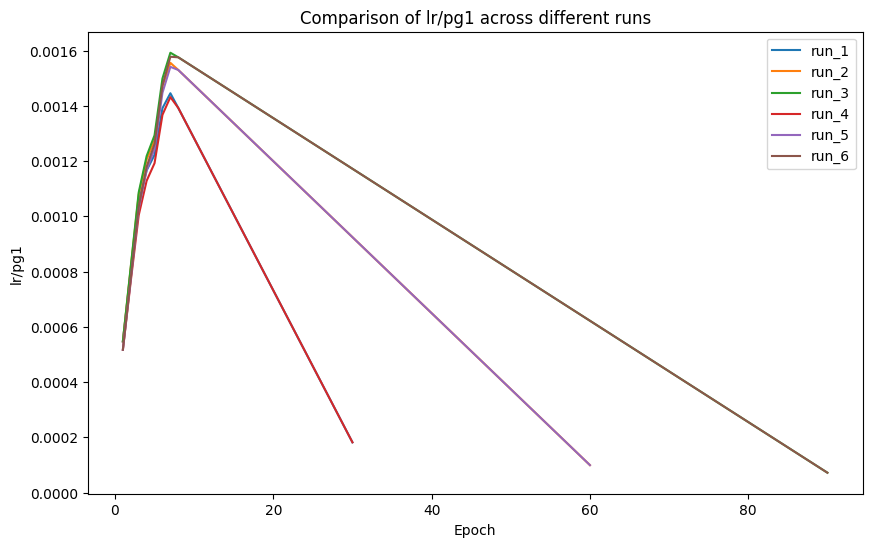

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

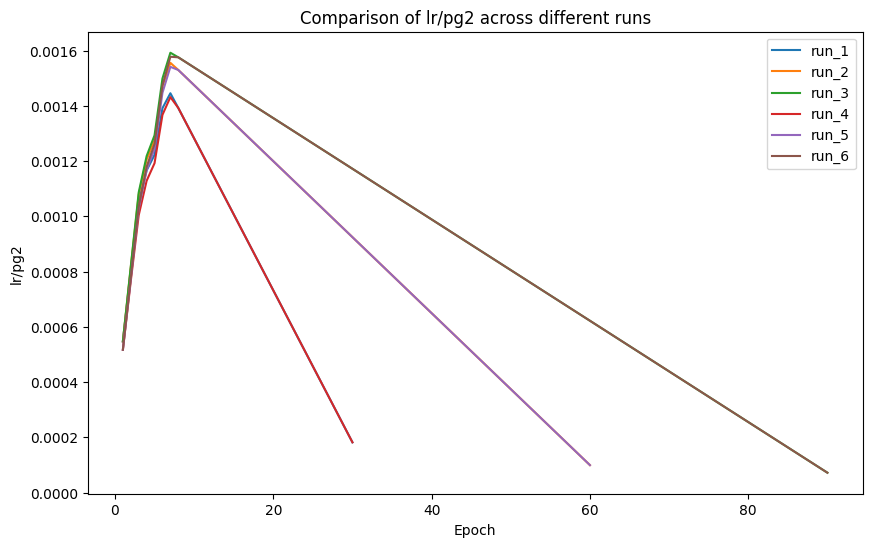

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The best run based on max mAP50 is: run_2
The best run based on max mAP50-95 is: run_4


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Función para cargar resultados y limpiar nombres de columnas
def load_results(file_path, run_name):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()  # Limpiar los nombres de las columnas
    df['run'] = run_name
    return df

# Cargar los resultados de los diferentes entrenamientos
results_1 = load_results('/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/entrenamientos/prueba1/runs/detect/train/results.csv', 'run_1')
results_2 = load_results('/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/entrenamientos/prueba2/runs/detect/train/results.csv', 'run_2')
results_3 = load_results('/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/entrenamientos/prueba3/runs/detect/train/results.csv', 'run_3')
results_4 = load_results('/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/entrenamientos/prueba4/runs/detect/train/results.csv', 'run_4')
results_5 = load_results('/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/entrenamientos/prueba5/runs/detect/train/results.csv', 'run_5')
results_6 = load_results('/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/entrenamientos/prueba6/runs/detect/train/results.csv', 'run_6')


# Combinar todos los resultados en un único DataFrame
all_results = pd.concat([results_1, results_2, results_3, results_4, results_5, results_6], ignore_index=True)

# Verificar las columnas disponibles después de limpiar
print(all_results.columns)

# Función para aplicar la media móvil
def smooth_data(data, window_size=5):
    return data.rolling(window=window_size, min_periods=1).mean()

# Métricas a comparar
metrics = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
    'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
    'lr/pg0', 'lr/pg1', 'lr/pg2'
]

# Visualizar, guardar y descargar las métricas
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for run in all_results['run'].unique():
        run_results = all_results[all_results['run'] == run]
        smoothed_results = smooth_data(run_results[metric])
        plt.plot(run_results['epoch'], smoothed_results, label=run)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} across different runs')
    plt.legend()
    file_name = f'{metric.replace("/", "_")}.png'
    plt.savefig(file_name)
    plt.show()
    files.download(file_name)

# Identificar la mejor ejecución basándose en la métrica deseada (por ejemplo, mAP50)
best_run_map50 = all_results.groupby('run')['metrics/mAP50(B)'].max().idxmax()
best_run_map50_95 = all_results.groupby('run')['metrics/mAP50-95(B)'].max().idxmax()

print(f'The best run based on max mAP50 is: {best_run_map50}')
print(f'The best run based on max mAP50-95 is: {best_run_map50_95}')



# **VIDEOS**

### Importamos librerias

In [ ]:
import cv2
import numpy as np
import os
from ultralytics import YOLO
from collections import defaultdict, deque

### Paths

In [ ]:
#Definir las Rutas del Video y del Modelo
video_path = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/videos/Augusto_1_converted - Trim.mp4'
video_path_out = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/videos/Augusto_1_converted - Trim_suavizado7.mp4'
#model_path = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/entrenamientos/prueba6/runs/detect/train/weights/last.pt'
model_path = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/runs/detect/train/weights/last.pt'

### Prueba videos


In [ ]:
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))


# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

### Prueba videos % de aciertos

In [ ]:
# Definir el intervalo de tiempo en segundos
start_time = 0  # segundo de inicio
end_time = 5   # segundo de fin
class_id_to_detect = 0  # ID de la clase "persona"

# Cargar el video de entrada
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
start_frame = int(start_time * fps)
end_frame = int(end_time * fps)

# Configurar el video de salida con las mismas dimensiones y FPS que el video de entrada
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), fps, (W, H))

# Cargar el modelo entrenado
model = YOLO(model_path)

# Umbral de detección inicial
threshold = 0.5

# Contadores para evaluar la detección
total_frames = end_frame - start_frame
detected_frames = 0

# Procesar el video frame a frame
current_frame = 0
while ret:
    if start_frame <= current_frame <= end_frame:
        results = model(frame)[0]
        detected_in_frame = False

        for result in results.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = result

            if score > threshold:
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

                if class_id == class_id_to_detect:
                    detected_in_frame = True

        if detected_in_frame:
            detected_frames += 1

    out.write(frame)
    ret, frame = cap.read()
    current_frame += 1

cap.release()
out.release()
cv2.destroyAllWindows()

# Calcular el porcentaje de detección correcta
if total_frames > 0:
    detection_percentage = (detected_frames / total_frames) * 100
else:
    detection_percentage = 0

print(f'Porcentaje de detección correcta de la clase {class_id_to_detect} en el intervalo de tiempo [{start_time}, {end_time}]: {detection_percentage:.2f}%')



0: 384x640 1 person, 8.4ms
Speed: 2.4ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 3.7ms preprocess, 12.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.3ms
Speed: 2.7ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.6ms
Speed: 2.8ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 2.7ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 2.7ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 38

### Suavizado prueba videos

In [ ]:
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# Cargar el modelo entrenado
model = YOLO(model_path)

# Umbral de detección inicial
initial_threshold = 0.5
# Historial de detecciones
detection_history = defaultdict(lambda: deque(maxlen=5))

while ret:
    results = model(frame)[0]

    frame_detections = []

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > initial_threshold:
            frame_detections.append((x1, y1, x2, y2, score, class_id))
            detection_history[class_id].append((x1, y1, x2, y2, score))

    # Revisar el historial para ajustar el umbral si es necesario
    for class_id, history in detection_history.items():
        if len(history) > 0:
            avg_score = np.mean([h[4] for h in history])
            if avg_score > initial_threshold:
                adjusted_threshold = initial_threshold * 0.9
            else:
                adjusted_threshold = initial_threshold
        else:
            adjusted_threshold = initial_threshold

        for detection in frame_detections:
            x1, y1, x2, y2, score, class_id = detection

            if score > adjusted_threshold:
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
0: 384x640 3 persons, 192.6ms
Speed: 3.8ms preprocess, 192.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 162.1ms
Speed: 5.6ms preprocess, 162.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 200.1ms
Speed: 8.9ms preprocess, 200.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 159.7ms
Speed: 5.5ms preprocess, 159.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 180.7ms
Speed: 7.6ms preprocess, 180.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 241.9ms
Speed: 11.8ms preprocess, 241.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 273.2ms
Speed: 11.6ms preprocess, 273.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 248.1ms
Speed: 3.7ms p

### Suavizado prueba 2

In [ ]:
# Definir el intervalo de tiempo en segundos
start_time = 35  # segundo de inicio
end_time = 151    # segundo de fin
class_id_to_detect = 1  # ID de la clase "coche"

# Cargar el video de entrada
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
start_frame = int(start_time * fps)
end_frame = int(end_time * fps)

# Configurar el video de salida con las mismas dimensiones y FPS que el video de entrada
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), fps, (W, H))

# Cargar el modelo entrenado
model = YOLO(model_path)

# Umbral de detección inicial
initial_threshold = 0.5
# Historial de detecciones
detection_history = defaultdict(lambda: deque(maxlen=5))

# Contadores para evaluar la detección
total_frames = end_frame - start_frame
detected_frames = 0

# Procesar el video frame a frame
current_frame = 0
while ret:
    if start_frame <= current_frame <= end_frame:
        results = model(frame)[0]
        detected_in_frame = False

        frame_detections = []

        for result in results.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = result

            if score > initial_threshold:
                frame_detections.append((x1, y1, x2, y2, score, class_id))
                detection_history[class_id].append((x1, y1, x2, y2, score))

        # Revisar el historial para ajustar el umbral si es necesario
        for class_id, history in detection_history.items():
            if len(history) > 0:
                avg_score = np.mean([h[4] for h in history])
                if avg_score > initial_threshold:
                    adjusted_threshold = initial_threshold * 0.9
                else:
                    adjusted_threshold = initial_threshold
            else:
                adjusted_threshold = initial_threshold

            for detection in frame_detections:
                x1, y1, x2, y2, score, class_id = detection

                if score > adjusted_threshold:
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                    cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

                    if class_id == class_id_to_detect:
                        detected_in_frame = True

        if detected_in_frame:
            detected_frames += 1

    out.write(frame)
    ret, frame = cap.read()
    current_frame += 1

cap.release()
out.release()
cv2.destroyAllWindows()

# Calcular el porcentaje de detección correcta
if total_frames > 0:
    detection_percentage = (detected_frames / total_frames) * 100
else:
    detection_percentage = 0

print(f'Porcentaje de detección correcta de la clase {class_id_to_detect} en el intervalo de tiempo [{start_time}, {end_time}]: {detection_percentage:.2f}%')


Streaming output truncated to the last 5000 lines.
Speed: 2.2ms preprocess, 96.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 105.6ms
Speed: 1.7ms preprocess, 105.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 97.2ms
Speed: 1.7ms preprocess, 97.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 95.4ms
Speed: 1.8ms preprocess, 95.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 106.6ms
Speed: 2.5ms preprocess, 106.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 101.8ms
Speed: 1.9ms preprocess, 101.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 96.4ms
Speed: 2.3ms preprocess, 96.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 101.0ms
Speed: 1.6m

### Suavizado prueba 3

In [ ]:
# Definir el intervalo de tiempo en segundos
start_time = 45  # segundo de inicio
end_time = 110   # segundo de fin

# Cargar el video de entrada
cap = cv2.VideoCapture(video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
start_frame = int(start_time * fps)
end_frame = int(end_time * fps)

# Configurar el video de salida con las mismas dimensiones y FPS que el video de entrada
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), fps, (W, H))

# Cargar el modelo entrenado
model = YOLO(model_path)

# Umbrales de detección iniciales para coches y personas
thresholds = {
    1: 0.5,  # coche
    0: 0.5   # persona
}
# Historial de detecciones
detection_history = defaultdict(lambda: deque(maxlen=5))
# Ajuste progresivo de los umbrales
threshold_adjustment_factor = 0.9  # factor de reducción progresiva
increase_threshold_factor = 1.05  # factor de incremento del umbral

# Contadores para evaluar la detección
total_frames = end_frame - start_frame
detected_frames = defaultdict(int)
consecutive_detected_frames = defaultdict(int)  # contador de frames consecutivos con detección exitosa
consecutive_missed_frames = defaultdict(int)  # contador de frames consecutivos sin detección

# Procesar el video frame a frame
current_frame = 0
while ret:
    if start_frame <= current_frame <= end_frame:
        results = model(frame)[0]
        detected_in_frame = {1: False, 0: False}  # para coches y personas

        frame_detections = []

        for result in results.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = result

            if score > thresholds[class_id]:
                frame_detections.append((x1, y1, x2, y2, score, class_id))
                detection_history[class_id].append((x1, y1, x2, y2, score))

        # Revisar el historial para ajustar los umbrales si es necesario
        for class_id, history in detection_history.items():
            if len(history) > 0:
                avg_score = np.mean([h[4] for h in history])
                if avg_score > thresholds[class_id]:
                    adjusted_threshold = thresholds[class_id] * threshold_adjustment_factor
                else:
                    adjusted_threshold = thresholds[class_id]
            else:
                adjusted_threshold = thresholds[class_id]

            for detection in frame_detections:
                x1, y1, x2, y2, score, class_id = detection

                if score > adjusted_threshold:
                    cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                    cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

                    detected_in_frame[class_id] = True

        for class_id in detected_in_frame.keys():
            if detected_in_frame[class_id]:
                detected_frames[class_id] += 1
                consecutive_detected_frames[class_id] += 1
                consecutive_missed_frames[class_id] = 0  # resetear el contador de frames sin detección
                # Reducir el umbral cada 5 frames consecutivos con detección exitosa
                if consecutive_detected_frames[class_id] >= 5:
                    thresholds[class_id] *= threshold_adjustment_factor
                    consecutive_detected_frames[class_id] = 0  # resetear el contador
            else:
                consecutive_detected_frames[class_id] = 0  # resetear el contador de frames con detección
                consecutive_missed_frames[class_id] += 1
                # Incrementar el umbral cada 5 frames consecutivos sin detección
                if consecutive_missed_frames[class_id] >= 5:
                    if thresholds[class_id] < 0.5:
                        thresholds[class_id] *= increase_threshold_factor
                        if thresholds[class_id] > 0.5:
                            thresholds[class_id] = 0.5
                    consecutive_missed_frames[class_id] = 0  # resetear el contador

    out.write(frame)
    ret, frame = cap.read()
    current_frame += 1

cap.release()
out.release()
cv2.destroyAllWindows()

# Calcular el porcentaje de detección correcta
for class_id, frames in detected_frames.items():
    detection_percentage = (frames / total_frames) * 100 if total_frames > 0 else 0
    print(f'Porcentaje de detección correcta de la clase {class_id} en el intervalo de tiempo [{start_time}, {end_time}]: {detection_percentage:.2f}%')



0: 384x640 1 car, 136.5ms
Speed: 3.2ms preprocess, 136.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 131.2ms
Speed: 2.4ms preprocess, 131.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 132.8ms
Speed: 2.3ms preprocess, 132.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 132.7ms
Speed: 2.5ms preprocess, 132.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 130.6ms
Speed: 2.4ms preprocess, 130.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 134.7ms
Speed: 2.3ms preprocess, 134.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 car, 134.1ms
Speed: 2.4ms preprocess, 134.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 135.4ms
Speed: 2.4ms preprocess, 135.4ms inference, 0.5ms postproc

### Evaluación del modelo aplicado a los videos


In [ ]:
# Definir la ruta del modelo
model_path = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/runs/detect/train/weights/last.pt'

# Cargar el modelo entrenado
model = YOLO(model_path)

# Realizar video captura desde la cámara web
cap = cv2.VideoCapture(0)

# Empezamos:
while True:
    # Realizar lectura de la VideoCaptura
    ret, frame = cap.read()

    if not ret:
        print("No se pudo acceder a la cámara.")
        break

    # Realizamos detecciones
    results = model(frame)[0]

    # Dibujar los resultados de las detecciones en el frame
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > 0.5:  # Umbral de detección
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, results.names[int(class_id)], (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Mostrar el frame con detecciones
    cv2.imshow('Detector de objetos', frame)

    # Leer el teclado
    t = cv2.waitKey(5)
    if t == 27:  # Presionar 'Esc' para salir
        break

cap.release()
cv2.destroyAllWindows()

No se pudo acceder a la cámara.


# **Extras**

### Transformamos dataset a blanco y negro

In [ ]:
# Blanco y negro
# Directorio de entrada y salida
input_dir = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/data/images/val'  # Reemplaza con tu ruta de entrada
output_dir = 'content/data/images/val'   # Reemplaza con tu ruta de salida

# Crea el directorio de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Recorre todos los archivos en el directorio de entrada
for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Puedes añadir más extensiones si es necesario
        # Leer la imagen en color
        img_color = cv2.imread(os.path.join(input_dir, filename))

        # Convertir la imagen a blanco y negro
        img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

        # Guardar la imagen en el directorio de salida
        cv2.imwrite(os.path.join(output_dir, filename), img_gray)

        print(f'Convertida: {filename}')

print('Conversión completada.')


Convertida: 0473-p.png
Convertida: 0497-p.png
Convertida: 0489-p.png
Convertida: 0501-p.png
Convertida: 0503-p.png
Convertida: 0474-p.png
Convertida: 0477-p.png
Convertida: 0484-p.png
Convertida: 0485-p.png
Convertida: 0500-p.png
Convertida: 0476-p.png
Convertida: 0479-p.png
Convertida: 0490-p.png
Convertida: 0483-p.png
Convertida: 0491-p.png
Convertida: 0467-p.png
Convertida: 0492-p.png
Convertida: 0496-p.png
Convertida: 0488-p.png
Convertida: 0486-p.png
Convertida: 0480-p.png
Convertida: 0472-p.png
Convertida: 0464-p.png
Convertida: 0504-p.png
Convertida: 0481-p.png
Convertida: 0494-p.png
Convertida: 0469-p.png
Convertida: 0475-p.png
Convertida: 0470-p.png
Convertida: 0495-p.png
Convertida: 0471-p.png
Convertida: 0498-p.png
Convertida: 0468-p.png
Convertida: 0499-p.png
Convertida: 0493-p.png
Convertida: 0502-p.png
Convertida: 0478-p.png
Convertida: 0482-p.png
Convertida: 0487-p.png
Convertida: 0559-p.png
Convertida: 0538-p.png
Convertida: 0536-p.png
Convertida: 0549-p.png
Convertida:

### Movemos txt al cuaderno

In [ ]:
import shutil
import os

# Define los directorios de origen y destino
source_folder = '/content/gdrive/My Drive/ComputerVision/TrainYOLOv8CustomDataset/data/labels'
destination_folder = '/content/content/data/labels'

# Asegúrate de que el directorio de destino exista, si no, créalo
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Copia los archivos y directorios
for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    destination_item = os.path.join(destination_folder, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, destination_item)
    else:
        shutil.copy2(source_item, destination_item)

print("Archivos copiados correctamente.")


Archivos copiados correctamente.


# Detección en tiempo real